# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [3]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [4]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

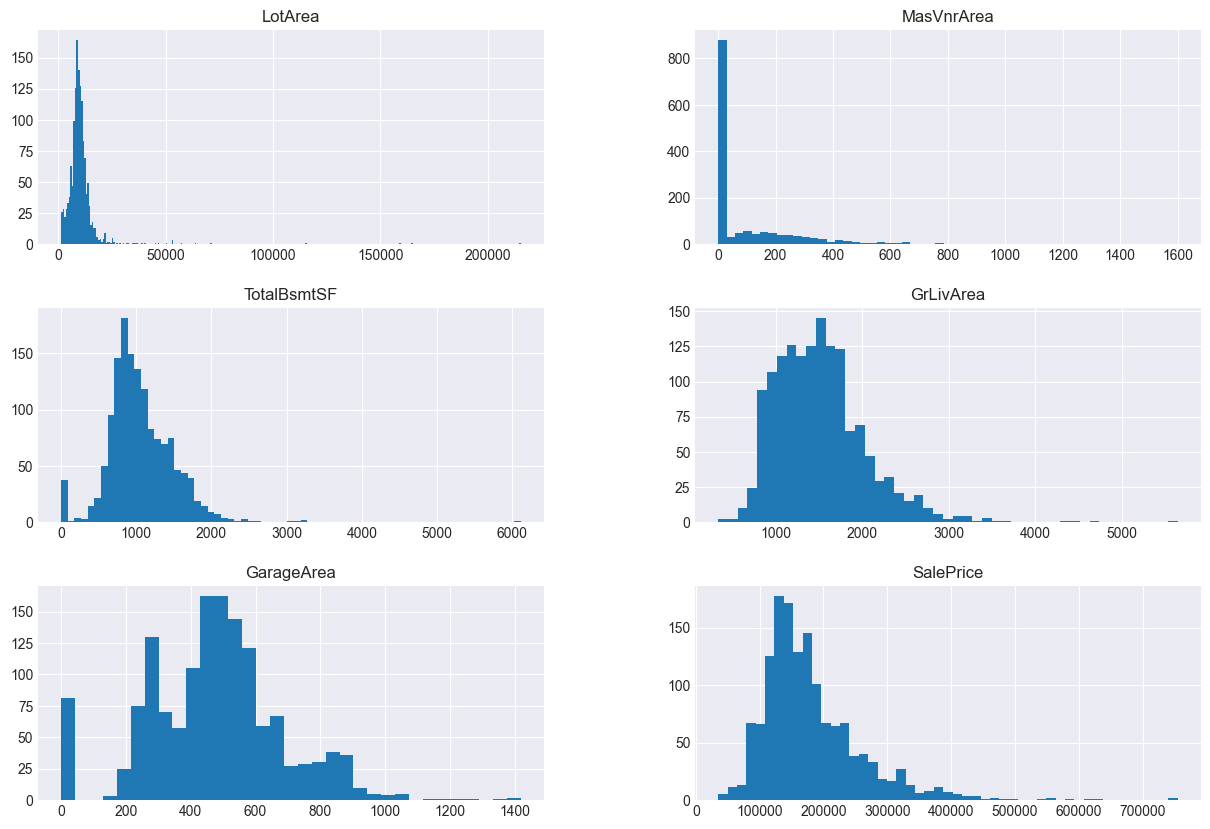

In [5]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [6]:
# Your code here - build a linear regression model with un-transformed features
#importing the necessary libraries 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Assigning X and Y variables data 
X = ames[['LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']]
y = ames['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[192262.68751765 215382.89427882 224623.09282961 286602.9433394
 148674.60914645 218582.09435621 280210.76194593 126155.44703437
  91786.14623532  79958.71291754 185509.37514121 192442.89130131
 166162.23580452 164085.37013018 243014.73343446 178857.35404656
  92381.38831461 113390.79271547 190540.91000399 220215.20796563
 204081.22599825 296873.78018579 233352.10908534 167108.67378427
 197591.88788411 215563.00815998 150377.76209981 104878.50080544
 117643.16139423 254066.92486613 144140.13050589 198976.24727436
 333273.5379926  195738.48709407 116141.63185214 185496.9106857
 128192.00280995 270496.79861335 201088.07741307 174510.33199232
 202307.60749067 175529.54664203 159829.28974677 293968.96430903
  46690.05909182 295737.28015357 230868.37644196 144933.49949599
 165124.92858044 205210.90907297 147717.08697903 190543.53213125
 133628.86234147 265001.553733   205810.78292171 185524.49326497
  67158.09164869 119543.92742343 227243.1097229  122717.30669074
  85836.73192851 214945.285

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [7]:
# Your written answer here
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1598899456.9063282
R^2 Score: 0.7381634586506278
Model Coefficients: [ 0.24915817 58.04812018 39.91574954 62.67526705 96.00655405]
Intercept: -10806.486185647373


In [8]:
import statsmodels.api as sm

X_const =sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          1.42e-267
Time:                        07:45:02   Log-Likelihood:                -14122.
No. Observations:                1161   AIC:                         2.826e+04
Df Residuals:                    1155   BIC:                         2.829e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.081e+04   4776.326     -2.263      

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [9]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
# performing Linear Transformation
#1square foot = 0.092903 square meters
features = ["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea", "GarageArea"]
sqft_to_sqm = 0.092903

# Convert each coefficient from per square foot to per square meter
coef_per_sqm = model.coef_ / sqft_to_sqm

# Display the converted coefficients
for feature, coef in zip(features, coef_per_sqm):
    print(f"{feature}: {coef:.2f} per square meter")

LotArea: 2.68 per square meter
MasVnrArea: 624.83 per square meter
TotalBsmtSF: 429.65 per square meter
GrLivArea: 674.63 per square meter
GarageArea: 1033.41 per square meter


In [10]:
# Your written answer here
print(f"For every additional square meter of lot size, the model predicts an increase of approximately $2.68 in the sale price, holding all else constant.")

print(f"For every additional square meter of masonry veneer area, the sale price increases by around $624.83, assuming other factors remain unchanged.")

print(f"An increase of one square meter in basement size is associated with a $429.65 increase in the sale price.")

print(f"Each extra square meter of above-ground living area adds about $674.63 to the expected sale price.")

print(f"For every additional square meter of garage space, the predicted sale price increases by approximately $1,033.41.")


For every additional square meter of lot size, the model predicts an increase of approximately $2.68 in the sale price, holding all else constant.
For every additional square meter of masonry veneer area, the sale price increases by around $624.83, assuming other factors remain unchanged.
An increase of one square meter in basement size is associated with a $429.65 increase in the sale price.
Each extra square meter of above-ground living area adds about $674.63 to the expected sale price.
For every additional square meter of garage space, the predicted sale price increases by approximately $1,033.41.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [13]:
# Your code here - center data
from sklearn.preprocessing import StandardScaler

# Center the data
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)  # This centers the data



In [14]:
# Your code here - build a new model
#Fit a new linear regression model
model_centered = LinearRegression()
model_centered.fit(X_centered, y)

# Step 3: Report the new intercept
print("New Intercept:", model_centered.intercept_)
print("New Intercept (price for average house):", model_centered.intercept_)

New Intercept: 180615.06336088156
New Intercept (price for average house): 180615.06336088156


In [15]:
# Your written answer here - interpret the new intercept
print(f"The new intercept of {model_centered.intercept_} represents the predicted price of a home with average values for all features in the dataset.")

The new intercept of 180615.06336088156 represents the predicted price of a home with average values for all features in the dataset.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [17]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
# Standardize the features (mean = 0, std = 1)
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

#Fit a new linear regression model on standardized features
model_std = LinearRegression()
model_std.fit(X_standardized, y)

# Get standardized coefficients and match them to feature names
import pandas as pd

coefficients = model_std.coef_
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)



In [18]:
# Your written answer here - identify the "most important" feature
# Display the most important feature
print("Standardized Coefficients:\n", feature_importance)
print("\nMost important feature:", feature_importance.idxmax())

Standardized Coefficients:
 GrLivArea      33546.789995
GarageArea     20004.118478
TotalBsmtSF    19342.439798
MasVnrArea      9963.910355
LotArea         2564.130948
dtype: float64

Most important feature: GrLivArea


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!